<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2022

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 3 <br>
American Sign Language Image Classification
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
<br>
<font size=3 color=grey>
Author: Sayeh Jarollahi
</font>
                <br/>
    </div>

In [69]:
# Set your student number
student_number = 99105689
Name = 'Mehdi'
Last_Name = 'Lotfian'

In this question, you will train a neural network for classifying sign language images. The American  Sign Language (ASL) dataset consists of 2515 images from different numbers and alphabets. The images are in RGB format and are not the same size. The dataset is classified into 36 classes (10 numbers and 26 alphabets). 

You will need to train a model to classify this dataset into different categories. You are allowed to use MLP as well as CNN networks. 

**Grading Policy:** For a full mark on this assignment, your notebook should be completely runnable by the TA. Additionally, you must reach an accuracy of %96 on the test data.

It is highly recommended to use google colab and utilize its GPUs. However, if you want to run the notebook locally, you can reach and download the dataset in this [link](https://drive.google.com/file/d/11_4-N8EdtoLPiW3YyJ840CXM0FckO1e5/view?usp=share_link).



## Setup


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os

from PIL import Image
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from torch import nn
from q1_helper_code import get_files

from tqdm import tqdm
#########################################
#                                       #
#  import other necessery packages here #
#                                       #
#########################################

In [71]:
# NOTE: It is highly recommended to use colab GPUs!
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Download and unzip the dataset


In [72]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=11_4-N8EdtoLPiW3YyJ840CXM0FckO1e5' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11_4-N8EdtoLPiW3YyJ840CXM0FckO1e5" -O asl_dataset.zip && rm -rf /tmp/cookies.txt
! unzip asl_dataset.zip


--2023-02-05 01:31:50--  https://docs.google.com/uc?export=download&confirm=t&id=11_4-N8EdtoLPiW3YyJ840CXM0FckO1e5
Resolving docs.google.com (docs.google.com)... 108.177.126.139, 108.177.126.101, 108.177.126.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dahg1v89n16o9d7dkj7fjetmrthsib5h/1675560675000/05091738964991961299/*/11_4-N8EdtoLPiW3YyJ840CXM0FckO1e5?e=download&uuid=5fc3b9a3-16e9-45f1-81ad-54feea95f75b [following]
--2023-02-05 01:31:50--  https://doc-0o-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dahg1v89n16o9d7dkj7fjetmrthsib5h/1675560675000/05091738964991961299/*/11_4-N8EdtoLPiW3YyJ840CXM0FckO1e5?e=download&uuid=5fc3b9a3-16e9-45f1-81ad-54feea95f75b
Resolving doc-0o-bc-docs.googleusercontent.com (doc-0o-bc-docs.googleusercontent.com)... 108.177.127.

In [73]:
main_dir = "asl_dataset/asl_dataset"
class_dirs = os.listdir(main_dir)

## Transform 

Data transformation is the process of converting data from one format or structure into another format or structure. Transformers change pixel values but still keep almost the whole information of the image.[source](https://towardsdatascience.com/improves-cnn-performance-by-applying-data-transformation-bf86b3f4cef4) You can read more about them in the mentioned source. 

You are going to implement two different transformers from scratch. These transformers will be used once the data is loaded. 

### Resize 
This transformer recieves a tensor (3\*x\*y) and returns a tensor with shape (3\*size\*size)

In [74]:
class Resize(object):
    
    def __init__(self, size=50):
      self.size = size
      self.resize = transforms.Resize(self.size)
    #############################
    #       Code here           #
    #############################

    
  
    def __call__(self, x):
        '''
        This function recieves a tensor and applies the resizing on that and returns that tensor
        '''
        return self.resize(x)
    #############################
    #       Code here           #
    #############################

### GrayScale
This transform is helpful to decrease the number of channels, so the training gets faster. 

Feel free to add args to functions or change them if you need to!

In [75]:
class GrayScale(object):

    def __init__(self):
    #############################
    #       Code here           #
    #############################
      self.gray_scale = transforms.Grayscale()

    def __call__(self, x):
    #############################
    #       Code here           #
    #############################
      return self.gray_scale(x)

## Load Data and compose transforms 
You can combine Transforms using the **compose** method in the torchvision.transforms library.

In [76]:
# Ddd the implemented transforms
transform = transforms.Compose([
    transforms.ToTensor(), Resize(), GrayScale()
    #############################
    #         Code here         #
    #############################

])

Plot one random sample from each class of the datset:

<Figure size 792x792 with 0 Axes>

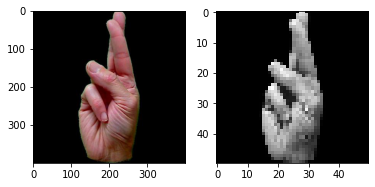

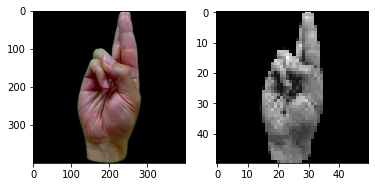

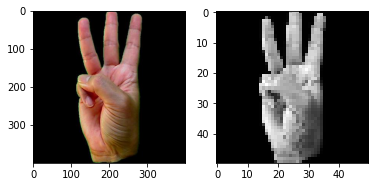

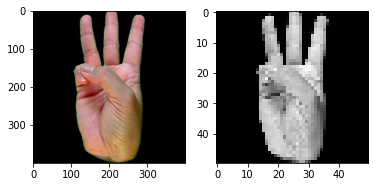

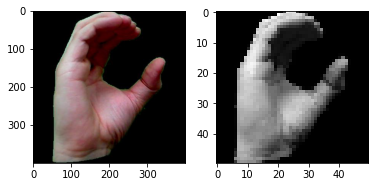

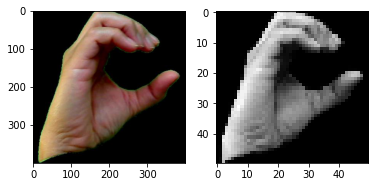

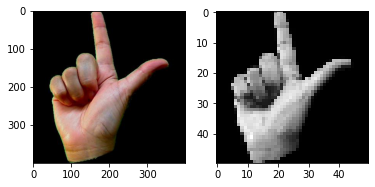

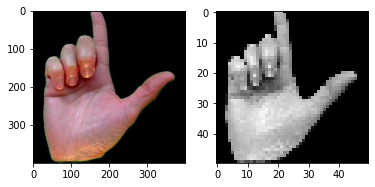

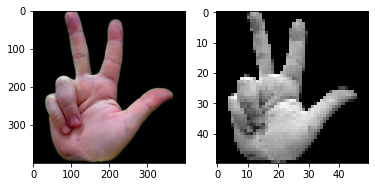

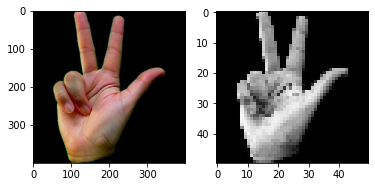

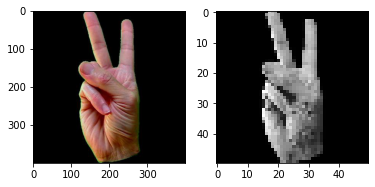

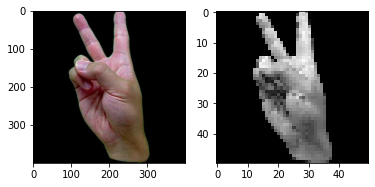

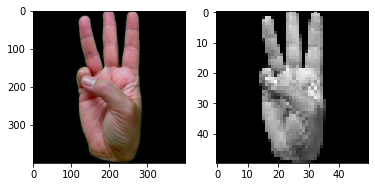

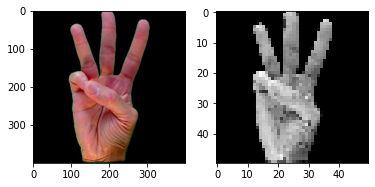

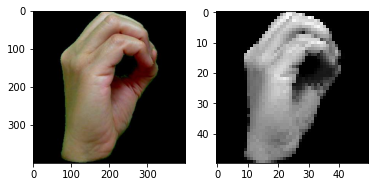

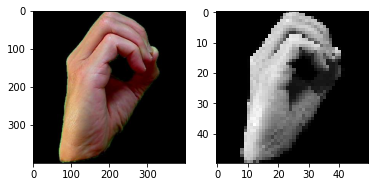

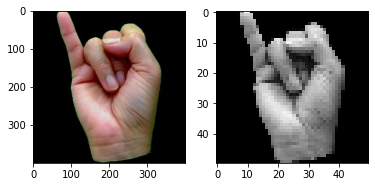

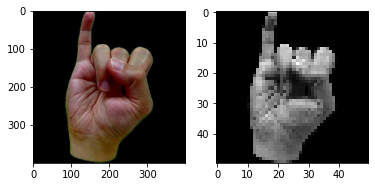

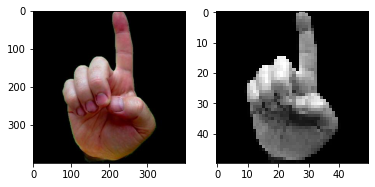

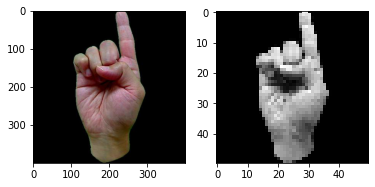

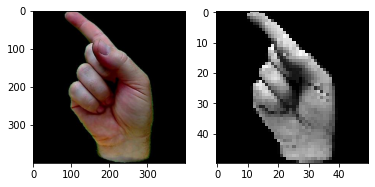

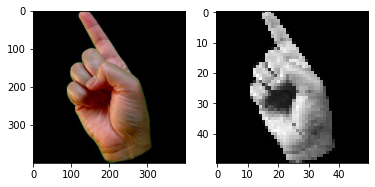

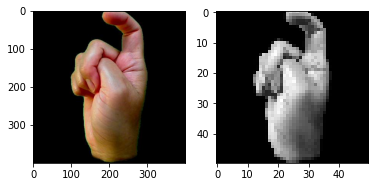

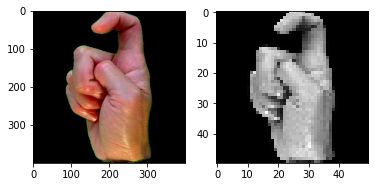

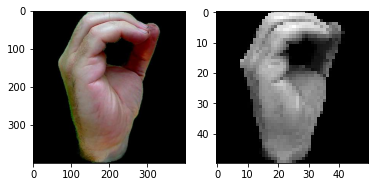

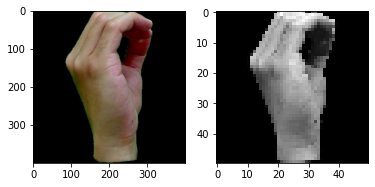

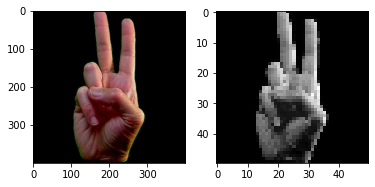

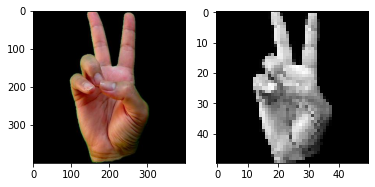

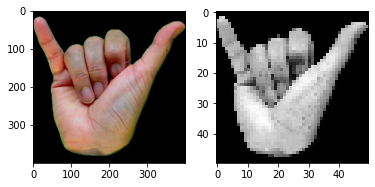

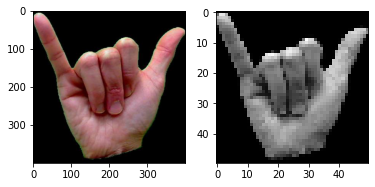

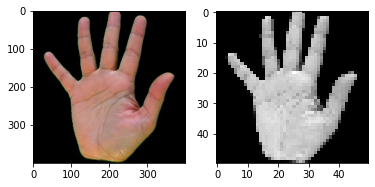

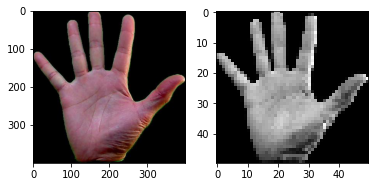

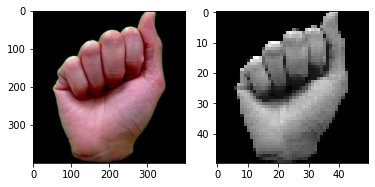

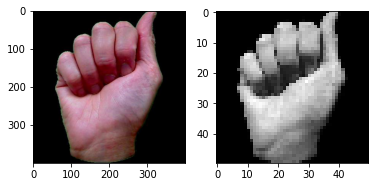

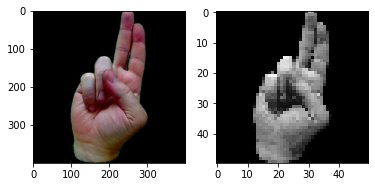

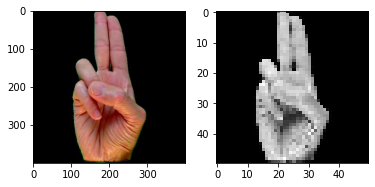

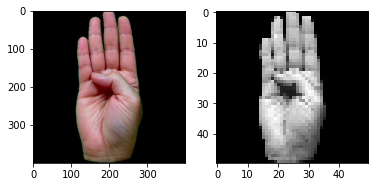

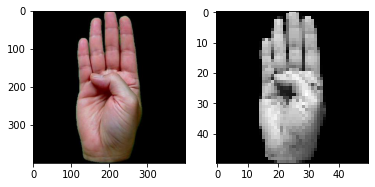

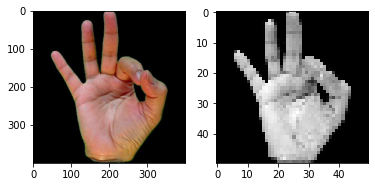

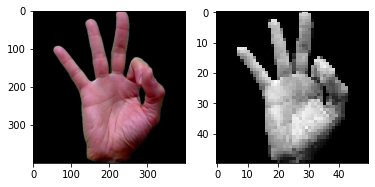

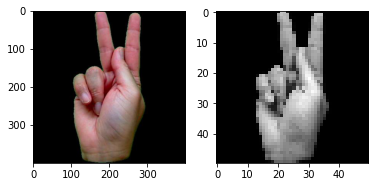

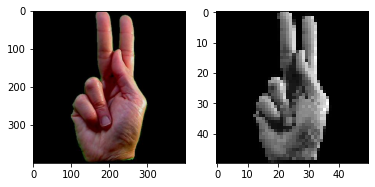

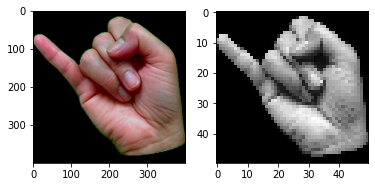

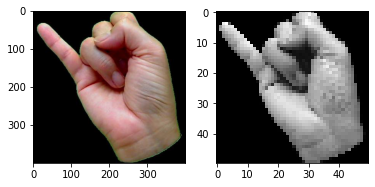

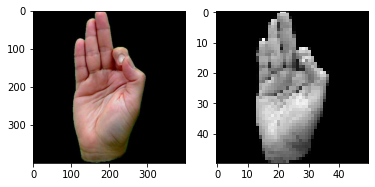

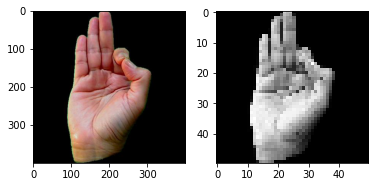

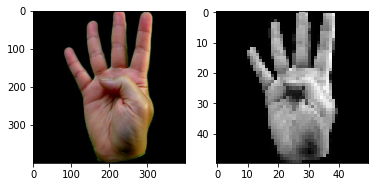

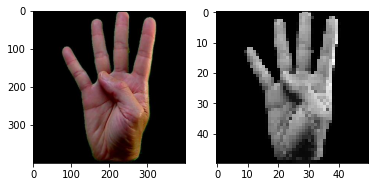

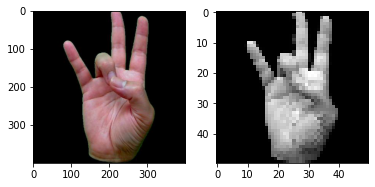

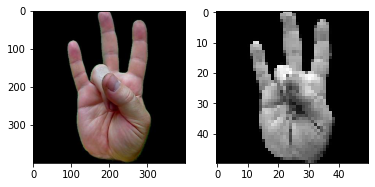

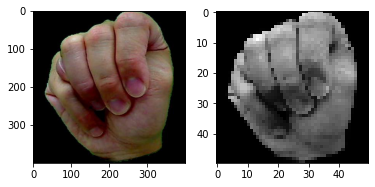

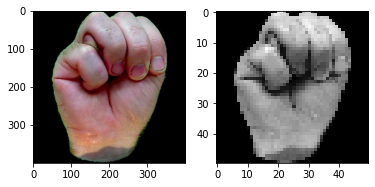

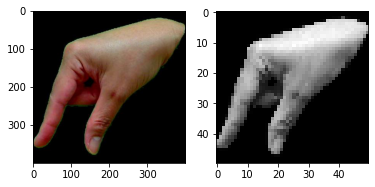

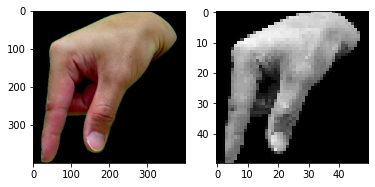

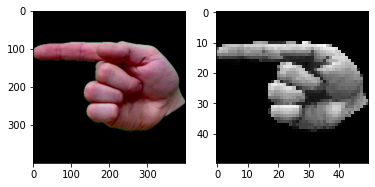

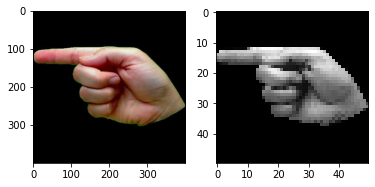

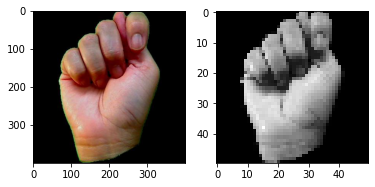

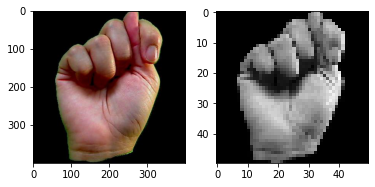

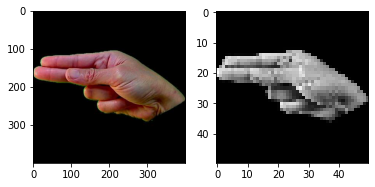

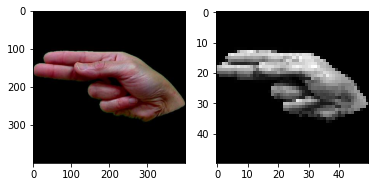

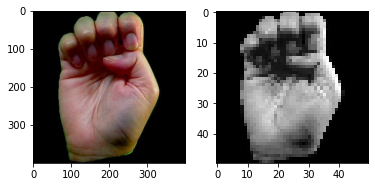

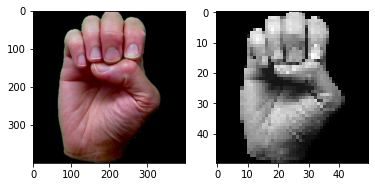

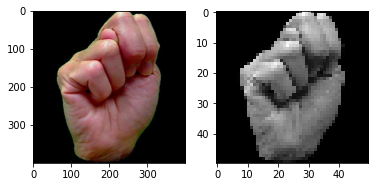

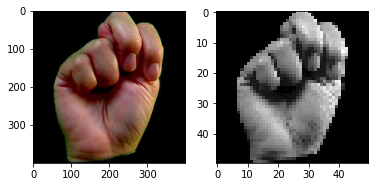

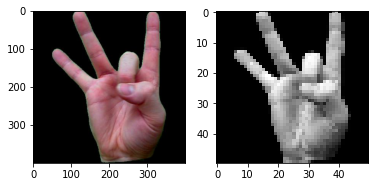

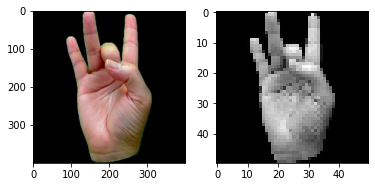

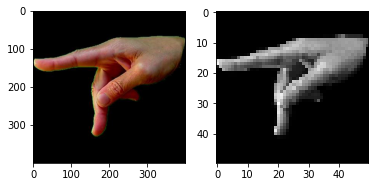

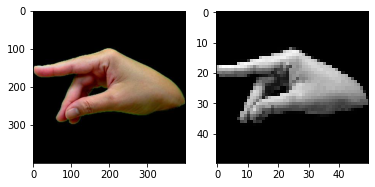

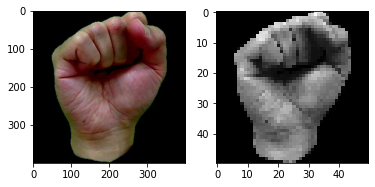

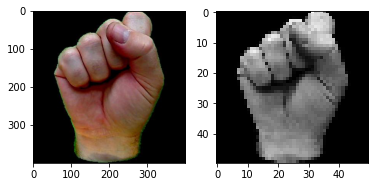

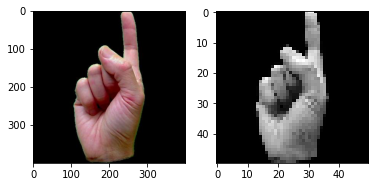

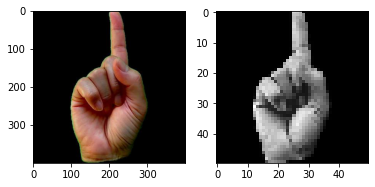

In [77]:
'''
Hint:
Get two random samples from files in each directory and use subplot to add those
images to the plot. 
Use previously defined transform to test your transforms
'''
plt.figure(figsize=(11,11))
n = len(class_dirs)
for i, directory in enumerate(class_dirs):
  # name of all files in the directory
  files_name = os.listdir(f"{main_dir}/{directory}")
  #############################
  #         Code here         #
  #############################
  random_idxs = random.sample(range(0, len(files_name) - 1), 2)
  img1 = Image.open(f"{main_dir}/{directory}/{files_name[random_idxs[0]]}")
  img2 = Image.open(f"{main_dir}/{directory}/{files_name[random_idxs[1]]}")
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(img1)
  ax2.imshow(transform(img1)[0], cmap = 'gray')
  plt.show()
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(img2)
  ax2.imshow(transform(img2)[0], cmap = 'gray')
  plt.show()

## Create Dataset 
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. [from [Pytorch Documentation](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)] 

In this section, you will implement a custom dataset which gets address of files and loads them as needed. 

In [78]:
class ASLDataset(Dataset):
    def __init__(self, files_address:list, labels, transform=transform):
        #############################
        #         Code here         #
        #############################
        self.files_address = files_address
        self.transform = transform
        self.labels = labels

    def __len__(self):
        # returns length of the data

        #############################
        #         Code here         #
        #############################
        return len(self.files_address)

    def __getitem__(self, idx):
        # Hint: load image from files_address and the label from name of the directory 
        # Remember to apply transforms!
        image = Image.open(self.files_address[idx])
        image = self.transform(image)
        label = self.labels[idx]
        #############################
        #         Code here         #
        #############################
        return image, label

In [79]:
files_addr, labels = get_files()
print(len(labels), len(files_addr))

2515 2515


## Create Datasets  

First split data to train, validation and test using the `train_test_split funciton`. Remember to shuffle data. Then create ASLDataset for each part of data. 

In [80]:
#############################
#         Code here         #
#############################
x_train, x_test, y_train, y_test = train_test_split(files_addr, labels, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)
train_dataset = ASLDataset(x_train, y_train)
val_dataset = ASLDataset(x_val, y_val)
test_dataset = ASLDataset(x_test, y_test)

Use datasets to create DataLoader from `torch.utils.DataLoader` class

Note: You should make `shuffle=True` for the training dataLoader, so in each epoch the data reshuffles. 

In [134]:
num_threads = 4

#############################
#         Code here         #
#############################
train_batch = 15
test_batch = 15
train_loader = DataLoader(train_dataset, batch_size=train_batch, shuffle=True, num_workers=num_threads)
val_loader = DataLoader(val_dataset, batch_size = test_batch, num_workers=num_threads)
test_loader = DataLoader(test_dataset, batch_size = test_batch, num_workers=num_threads)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Define Model 

In [170]:
class ASLModel(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.network1 = nn.Sequential(
            #############################
            #         Code here         #
            #############################
            nn.Conv2d(in_channels, 50, 6), 
            nn.BatchNorm2d(50),
            nn.ReLU(),
            nn.MaxPool2d(4),
            nn.Conv2d(50, 50, 4),
            nn.BatchNorm2d(50),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        self.network2 = nn.Sequential(
            nn.Linear(800, num_classes)
            )
        
    def forward(self, xb):
        #############################
        #         Code here         #
        #############################
        xb = self.network1(xb)
        xb = xb.reshape(xb.shape[0], -1)
        xb = self.network2(xb)
        return xb


In [171]:
in_channels = 1 
num_classes = 36
model = ASLModel(in_channels, num_classes).to(device)

## Define optimizer, Criterion and other parameters 


In [172]:
#############################
#         Code here         #
#############################
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 0.0015)

In [173]:
# Set parameters and hyper parameters
batch_size = 10
learning_rate = 0.0015 
input_size = None 

In [174]:
best_model_acc = [None, 0]

def train_val (model, trainloader, val_loader, f_loss, optimizer, n_epochs, device = device):
    global best_model_acc
    train_loss_arr, val_loss_arr = [], []
    train_acc_arr, val_acc_arr = [], []  
    for epoch in range(n_epochs):
        train_loss, val_loss = 0, 0
        model.train()
        #############################
        #         Code here         #
        #############################
        ## Hint: Loop throught train_loader, get images with their labels and train the model
        ## Hint 2: To update train_loss inside the loop use "train_loss += batch_loss * batch_size""
        ## Hint 3: To update train_acc get the predicted label of each training data and compare with the real label
        all_train_predictions = 0
        true_train_predictions = 0
        for input, label in tqdm(train_loader):
          input = input.to(device)
          label = label.to(device)
          outputs = model(input)
          prediction_idxs = outputs.argmax(-1)
          all_train_predictions += len(prediction_idxs)
          true_train_predictions += (prediction_idxs == label).sum()
          batch_loss = f_loss(outputs, label)
          train_loss += batch_size * batch_loss
          optimizer.zero_grad()
          batch_loss.backward()
          optimizer.step()
    
        model.eval()
        #############################
        #         Code here         #
        #############################
        ## Hint: Loop throught val_loader, get images with their labels and evaluate the model
        ## Hint 2: To update val_loss inside the loop use "val_loss += batch_loss * batch_size""
        ## Hint 3: you have to keep the best model in the best_model variable to use it in the testing phase
        all_validation_predictions = 0
        true_validation_predictions = 0
        for input, label in tqdm(val_loader):
          input = input.to(device)
          label = label.to(device)
          outputs = model(input)
          prediction_idxs = outputs.argmax(-1)
          all_validation_predictions += len(prediction_idxs)
          true_validation_predictions += (prediction_idxs == label).sum()
          batch_loss = f_loss(outputs, label)
          val_loss += batch_size * batch_loss

        train_acc = true_train_predictions/all_train_predictions
        train_acc_arr.append(train_acc)
        val_acc = true_validation_predictions/all_validation_predictions
        val_acc_arr.append(val_acc)
        if val_acc > best_model_acc[1]:
          best_model_acc[1] = val_acc
          best_model_acc[0] = model

        train_loss /= len(train_loader.dataset)
        val_loss /= len(val_loader.dataset)
        train_loss_arr.append(train_loss)
        val_loss_arr.append(val_loss)
        #############################
        #         Code here         #
        #############################
        # append accuracy of train and valid to the lists

        print(f"[Epoch {epoch}]\t"
            f"Train Loss: {train_loss:.3f}\t"
            f"Train Accuracy: {train_acc_arr[-1]}\t"
            f"Validation Loss: {val_loss:.3f}\t"
            f"Validation Accuracy: {val_acc_arr[-1]}")
    return train_loss_arr, val_loss_arr, train_acc_arr, val_acc_arr

In [175]:
# Call the train_val function
train_loss_arr, val_loss_arr, train_acc_arr, val_acc_arr = train_val(model,train_loader, val_loader, loss, optimizer, 10)

100%|██████████| 27/27 [00:01<00:00, 13.65it/s]


[Epoch 0]	Train Loss: 0.904	Train Accuracy: 0.6463642120361328	Validation Loss: 0.315	Validation Accuracy: 0.8660049438476562


100%|██████████| 27/27 [00:01<00:00, 18.39it/s]


[Epoch 1]	Train Loss: 0.196	Train Accuracy: 0.9173399806022644	Validation Loss: 0.193	Validation Accuracy: 0.9131513833999634


100%|██████████| 27/27 [00:01<00:00, 18.07it/s]


[Epoch 2]	Train Loss: 0.093	Train Accuracy: 0.9596022367477417	Validation Loss: 0.129	Validation Accuracy: 0.9305210709571838


100%|██████████| 27/27 [00:01<00:00, 18.26it/s]


[Epoch 3]	Train Loss: 0.067	Train Accuracy: 0.9738968014717102	Validation Loss: 0.126	Validation Accuracy: 0.9330024719238281


100%|██████████| 27/27 [00:01<00:00, 18.41it/s]


[Epoch 4]	Train Loss: 0.047	Train Accuracy: 0.978868842124939	Validation Loss: 0.107	Validation Accuracy: 0.96277916431427


100%|██████████| 27/27 [00:01<00:00, 16.12it/s]


[Epoch 5]	Train Loss: 0.018	Train Accuracy: 0.9950279593467712	Validation Loss: 0.098	Validation Accuracy: 0.9454094171524048


100%|██████████| 27/27 [00:01<00:00, 18.26it/s]


[Epoch 6]	Train Loss: 0.010	Train Accuracy: 0.9975139498710632	Validation Loss: 0.061	Validation Accuracy: 0.9702233076095581


100%|██████████| 27/27 [00:02<00:00, 11.98it/s]


[Epoch 7]	Train Loss: 0.011	Train Accuracy: 0.9975139498710632	Validation Loss: 0.096	Validation Accuracy: 0.9602977633476257


100%|██████████| 27/27 [00:01<00:00, 17.72it/s]


[Epoch 8]	Train Loss: 0.014	Train Accuracy: 0.9950279593467712	Validation Loss: 0.086	Validation Accuracy: 0.9602977633476257


100%|██████████| 27/27 [00:01<00:00, 17.87it/s]

[Epoch 9]	Train Loss: 0.007	Train Accuracy: 0.998757004737854	Validation Loss: 0.069	Validation Accuracy: 0.9727047085762024


## Plot loss and accuracy

You must have one plot for loss according to epoch for train/val.

Also, another plot for accuracy according to epoch for train/val

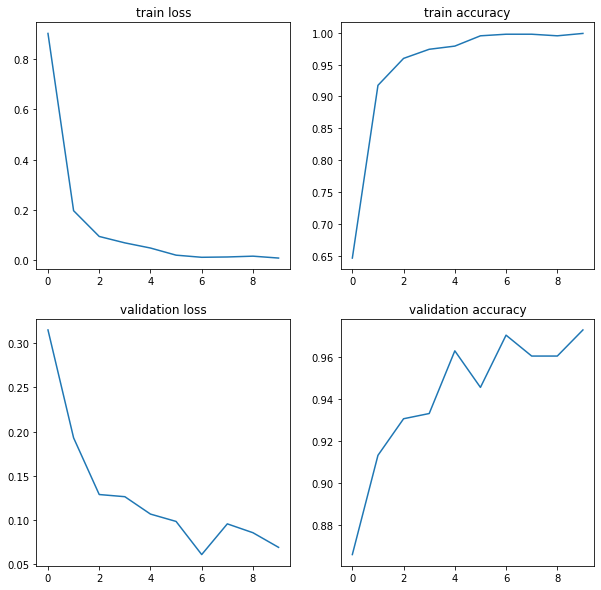

In [184]:
#############################
#         Code here         #
#############################
figure, axis = plt.subplots(2, 2)

figure.set_size_inches(10, 10)

axis[0, 0].set_title("train loss")
axis[0, 0].plot([val.cpu().detach().numpy() for val in train_loss_arr])

axis[1, 0].set_title("validation loss")
axis[1, 0].plot([val.cpu().detach().numpy() for val in val_loss_arr])

axis[0, 1].set_title("train accuracy")
axis[0, 1].plot([val.cpu().detach().numpy() for val in train_acc_arr])

axis[1, 1].set_title("validation accuracy")
axis[1, 1].plot([val.cpu().detach().numpy() for val in val_acc_arr])

plt.show()

## Evaluate model on the test dataset

Evaluate your best model on the test dataset. You should get accuracy above ***%96*** for a full-mark.

Remember to print the accuracy of model on the test dataset! 

In [191]:
#############################
#         Code here         #
#############################
best_model_acc[0].eval()
all_test_predictions = 0
true_test_predictions = 0
with torch.no_grad():
  for inputs, labels in tqdm(test_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    inputs = inputs.to(torch.float32)
    outputs = model(inputs)
    prediction_idxs = outputs.argmax(-1)
    all_test_predictions += len(prediction_idxs)
    true_test_predictions += (prediction_idxs == labels).sum()
test_accuracy = true_test_predictions/all_test_predictions
print(f"\naccuracy: {test_accuracy}")

100%|██████████| 34/34 [00:01<00:00, 18.35it/s]


accuracy: 0.9681907892227173
